## Task 1: Simple Linear Regression with Python
In this task, we are asked to predict the scores of the students depending upon the number of hours spent for studying.This is a regression task with only two variables.



### Data Preprocessing
This is the first step in working on any machine learning problem. This involves reading,cleaning and transforming the data such that the data is in a structered format which can be given as input to the machine learning model.

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
#Rreading the data present in the below url and displaying the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

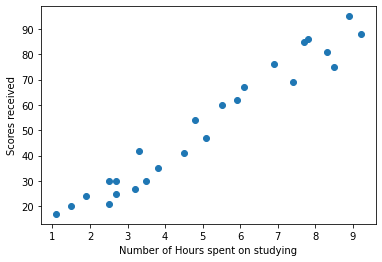

In [4]:
# scatter plot between Number of hours and Scores to see how much impact does hours have on the scores variable.
#As we can see below, more the number of hours a student spends studying, greater are the scores.
plt.scatter(data['Hours'], data['Scores']) 
plt.xlabel("Number of Hours spent on studying")
plt.ylabel("Scores received")
plt.show()   


In [5]:
#Checking the data types of the variables in the data
data.dtypes

Hours     float64
Scores      int64
dtype: object

### Split into train and test


In [6]:
#Separating the independent and target varibles
X = data[["Hours"]]
y = data["Scores"]



In [7]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5) 


In [8]:
#Checking the shape of X_train
X_train.shape

(20, 1)

In [9]:
#Checking the shape of y_train
y_train.shape

(20,)

### Model Building
Now that we have our train and test data, we build a simple linear regression model and fit X_train and y_train values so that the model can learn from this data and predict on the train and test data.

In [10]:
# Fit and make the predictions by the model
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [11]:
# Get Predictions for train and test data
train_predictions=lin_model.predict(X_train)
test_predictions=lin_model.predict(X_test)


In [12]:
#Printing the train predictions
train_predictions

array([21.34751484, 78.01693393, 46.32047918, 39.59698878, 17.50552032,
       52.08347095, 29.03150387, 34.79449564, 27.11050661, 59.76745998,
       69.37244627, 55.92546547, 36.7154929 , 82.81942707, 29.03150387,
       27.11050661, 91.46391473, 88.58241885, 13.66352581, 84.74042433])

In [13]:
#Printing the test predictions
test_predictions

array([74.17493942, 61.68845724, 33.83399701, 77.0564353 , 49.20197507])

In [14]:
# Comparing Actual vs Predicted test predictions
d = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions})  
d 

,Actual,Predicted
19,69,74.174939
18,67,61.688457
2,27,33.833997
10,85,77.056435
21,54,49.201975


### Model Evaluation
Finally, in order to check if our model is performing well we need a metric. In this case, I have considered Root Mean Squared Error.

In [15]:
# model evaluation for training set
rmse=np.sqrt(mean_squared_error(y_test,test_predictions))


print("The model performance for test set")
print("--------------------------------------")
print('RMSE  ', rmse)
print("\n")


The model performance for test set
--------------------------------------
RMSE   6.128903048630811


